In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2  # to perform image operations

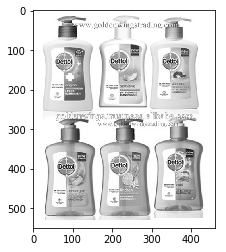

In [5]:
DATADIR = r'C:\Users\athiq.ahmed\Desktop\New folder\Images'

CATEGORIES = ["Dettol", "Non-Dettol"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [7]:
print(img_array.shape)

(550, 461)


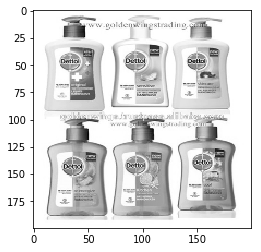

In [12]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [14]:
training_data = []

def create_training_data():
    for category in CATEGORIES: # do dogs and cats
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category) # get the classification  (0 or a 1). 0=dog 1=cat
        for img in os.listdir(path): # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array and gray scale
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # resize to normalize data size
                training_data.append([new_array,class_num]) # add this to our training_data
            except Exception as e:
                pass
            
create_training_data()   

In [15]:
print(len(training_data))

297


In [16]:
import random

random.shuffle(training_data)

In [17]:
for sample in training_data[:10]:
    print (sample[1])

1
0
0
0
0
1
0
1
1
0


In [18]:
X = []
y = []

In [19]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 for the grayscale

In [20]:
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [21]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [22]:
X[1]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)